In [23]:
import numpy as np 
import cv2
from skimage.feature import local_binary_pattern

In [24]:
import os
directory_list = list()
dir_path = "full_dataset"
for root, dirs, files in os.walk(dir_path, topdown=False):
    for name in dirs:
        directory_list.append((name))
#print(directory_list)
for directory in directory_list:
    print(directory)

catagory_0
catagory_1
catagory_10
catagory_100
catagory_101
catagory_102
catagory_103
catagory_104
catagory_105
catagory_106
catagory_107
catagory_108
catagory_109
catagory_11
catagory_110
catagory_111
catagory_12
catagory_13
catagory_14
catagory_15
catagory_16
catagory_17
catagory_18
catagory_19
catagory_2
catagory_20
catagory_21
catagory_22
catagory_23
catagory_24
catagory_25
catagory_26
catagory_27
catagory_28
catagory_29
catagory_3
catagory_30
catagory_31
catagory_32
catagory_33
catagory_34
catagory_35
catagory_36
catagory_37
catagory_38
catagory_39
catagory_4
catagory_40
catagory_41
catagory_42
catagory_43
catagory_44
catagory_45
catagory_46
catagory_47
catagory_48
catagory_49
catagory_5
catagory_50
catagory_51
catagory_52
catagory_53
catagory_54
catagory_55
catagory_56
catagory_57
catagory_58
catagory_59
catagory_6
catagory_60
catagory_61
catagory_62
catagory_63
catagory_64
catagory_65
catagory_66
catagory_67
catagory_68
catagory_69
catagory_7
catagory_70
catagory_71
catagory_72


In [25]:
import glob

labels = 'labels.csv'
labelfile = open(labels,'w')
for i in range(len(directory_list)):
    readpath = (dir_path+'/' + directory_list[i]+'/*jpg')
    #print(readpath)
    images = glob.glob(readpath)
    for image in images:
        labelfile.write(image+','+directory_list[i][9:len(directory_list[i])]+'\n')
labelfile.close()

In [26]:
import random
labels = 'labels.csv'
shuffled_labels = 'Shuffled_labels.csv'

labelfile = open(labels, "r")
lines = labelfile.readlines()
labelfile.close()
random.shuffle(lines)

shufflefile = open(shuffled_labels, "w")
shufflefile.writelines(lines)
shufflefile.close()

In [27]:
#to check uniform or not 
def uniform(pattern):
    pat= int(pattern)
    a=0
    b=0
    cnt=0
    for i in range(0,8):
        if( i==0 ):
            a= int(pattern/2**(7-i))
        else:
            b= int(pattern/2**(7-i))
            if(b!=a):
                cnt=cnt+1
                a=b
        pattern=pattern%2**(7-i)
    if(cnt<=2):
        return 1 #uniform hbe
    else:
        return 0
items = []
true_items = []
for i in range(0, 256):
    if uniform(i):
        items.append(i)
        true_items.append(i)
        
items.append(250)
true_items.append(250)
print(len(items))


59


In [28]:
import cv2
import numpy as np
def get(image, idx, idy):
    if idx < (len(image)) and idy < len(image[0]) and idx>=0 and idy >=0:
        return 1
    else:
        return 0
    
def dir(x,y,img):
	ax=int(img[x+1,y])-int(img[x,y])
	ay=int(img[x,y-1])-int(img[x,y])
    
	if ax>=0 and ay>=0:
		return 1
	elif ax<0 and ay>=0:
		return 2
	elif ax<0 and ay<0:
		return 3
	elif ax>=0 and ay<0:
		return 4
		
def d_ternary(x,y,img):
    t = 6
    out=[]
    fx=[0,-1,-1,-1,0,1,1,1]
    fy=[1,1,0,-1,-1,-1,0,1]
    val = int(img[x][y])
    for i in range(0, 8):
        n_x = x+fx[i]
        n_y = y+fy[i]
        val1=int(img[n_x][n_y])
        if val1 >= val + t:
            out.append(1)
        elif val1 <= val - t:
            out.append(-1)
        else:
            out.append(0)
    return out

def add_dict(dic, val):
    if val not in dic.keys():
        dic[250] = dic[250] +1
    else:
        dic[val] = dic[val] + 1

def ternary(img, dic1, dic2):
    fx=[0,-1,-1,-1,0,1,1,1]
    fy=[1,1,0,-1,-1,-1,0,1]
    for x in range(2, len(img)-2):
        for y in range(2, len(img[x])-2):
            value = d_ternary(x, y, img)
            val1=0
            val2=0
            for i in range(len(value)):
                if(value[i]==1):
                    val1+=2**(7-i)
                elif(value[i]==-1):
                    val2+=2**(7-i)
            add_dict(dic1, val1)
            add_dict(dic2, val2)
    return dic1, dic2

In [30]:
import cv2
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from scipy.stats import itemfreq
import time
from functools import wraps

df = pd.read_csv(shuffled_labels, header=None)
rows = df.iterrows()

X_addrs = []
X_hist = []
Y_hist = []
#row = rows[0]
j = 0


# uncomment below this for local tetra pattern
dic1 = {}
dic2 = {}


def create_dic():
    for i in range(len(items)):
        dic1[items[i]] = 0
        dic2[items[i]] = 0

start_time = time.time()      
for row in rows:
    #print(row[1][1])
    create_dic()
    img = cv2.imread(row[1][0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    new_x = []
    dic1, dic2 = ternary(img,dic1, dic2)
    
    x1 = []
    for i in dic1.keys():
        x1.append(dic1[i])
    x1 = np.array(x1)
    x1 = x1/np.sum(x1)
    
    x2 = []
    for i in dic2.keys():
        x2.append(dic2[i])
    x2 = np.array(x2)
    x2 = x2/np.sum(x2)
    
    
    #new_x = x1.tolist()+x2.tolist()+x3.tolist()+x4.tolist()
    new_x = x1.tolist()+x2.tolist()
    
    X_hist.append(new_x)
    X_addrs.append(row[1][0])
    Y_hist.append(row[1][1])
    if j%100==0:
        elapsed_time = time.time() - start_time
        print(str(j)+" done in " + str(elapsed_time))
        start_time = time.time()
    j = j + 1

0 done in 1.198315143585205
100 done in 99.99473428726196
200 done in 56.24032807350159
300 done in 68.00205636024475
400 done in 68.63469386100769
500 done in 57.66597628593445
600 done in 55.67211890220642
700 done in 45.21016240119934
800 done in 35.27781057357788
900 done in 36.32417941093445
1000 done in 41.83907985687256
1100 done in 49.0678985118866
1200 done in 67.90711116790771
1300 done in 63.2307870388031
1400 done in 58.20907425880432
1500 done in 52.22573971748352
1600 done in 108.2188835144043
1700 done in 85.81417560577393
1800 done in 92.71061086654663
1900 done in 38.74384021759033
2000 done in 44.72243571281433
2100 done in 58.78333568572998
2200 done in 47.68268942832947
2300 done in 48.53420424461365
2400 done in 36.227256298065186
2500 done in 34.18242383003235
2600 done in 47.153992891311646
2700 done in 48.706109285354614
2800 done in 49.00493335723877
2900 done in 41.270407915115356
3000 done in 53.703985929489136
3100 done in 81.18028044700623
3200 done in 73.8

In [31]:
print(X_addrs[0])
print(X_hist[0])
print(Y_hist[0])
#print(X_hist)
X_hist = np.array(X_hist)
Y_hist = np.array(Y_hist)
print(len(X_addrs))
print(len(X_hist[50]))
print(X_hist.shape)
#print((Y_hist))



full_dataset/catagory_27\D27_90_19.jpg
[0.1854188345473465, 0.016063995837669095, 0.015998959417273674, 0.015543704474505723, 0.02042143600416233, 0.01762486992715921, 0.0191207075962539, 0.014308012486992715, 0.01541363163371488, 0.017364724245577525, 0.017819979188345474, 0.01853537981269511, 0.01541363163371488, 0.02497398543184183, 0.02308792924037461, 0.012942247658688866, 0.016194068678459937, 0.01404786680541103, 0.013787721123829344, 0.01710457856399584, 0.0053329864724245574, 0.003707075962539022, 0.017364724245577525, 0.015283558792924038, 0.018665452653485952, 0.014242976066597295, 0.012291883454734651, 0.004227367325702393, 0.004162330905306972, 0.012552029136316338, 0.014568158168574402, 0.013852757544224766, 0.01860041623309053, 0.004942767950052029, 0.0043574401664932365, 0.0008454734651404787, 0.013332466181061394, 0.020551508844953173, 0.018275234131113424, 0.01138137356919875, 0.003967221644120707, 0.006308532778355879, 0.014763267429760666, 0.01853537981269511, 0.004

In [32]:
X_hist = np.array(X_hist)
Y_hist = np.array(Y_hist)

print(X_hist.shape, Y_hist.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X_hist), np.array(Y_hist), test_size=0.3)
X_train = np.array(X_train)
print(len(X_train))

'''
for i in range(len(X_train)):
    if(len(X_train[i]) != 26):
       print(len(X_train[i]))
'''

print(len(Y_train))

(21056, 118) (21056,)
14739
14739


(21056, 118)


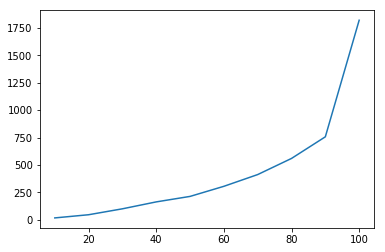

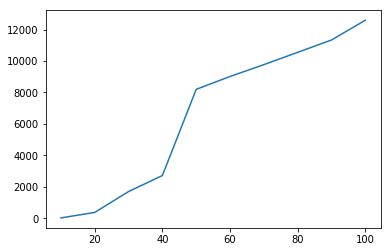

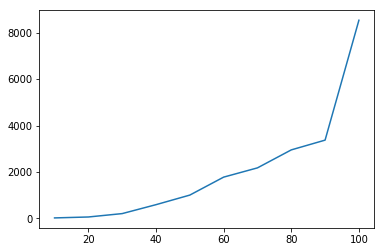

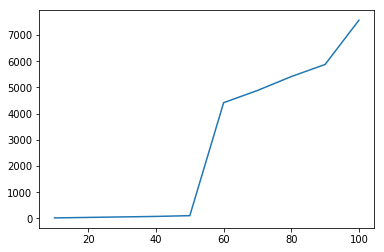

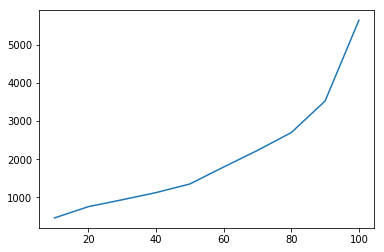

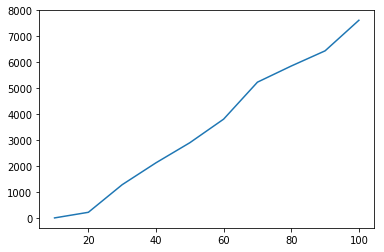

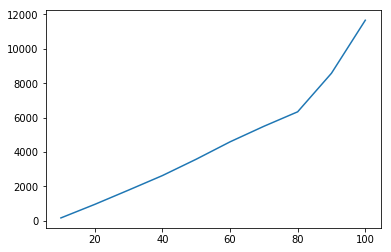

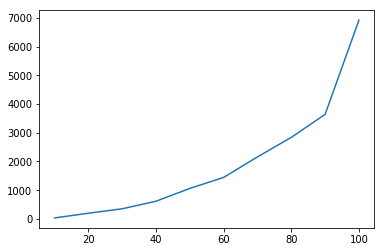

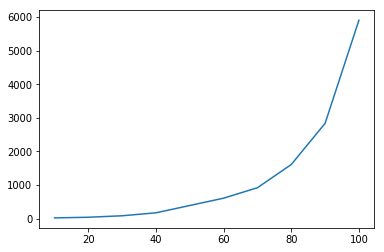

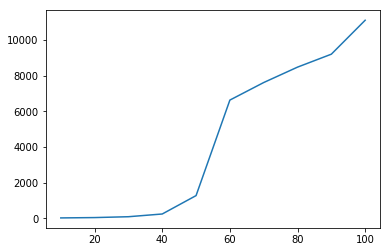

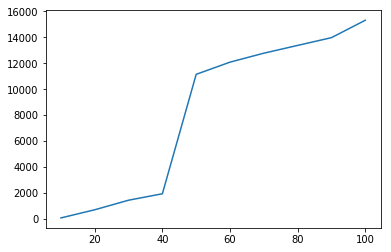

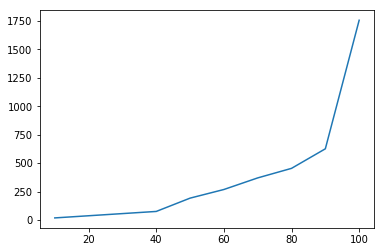

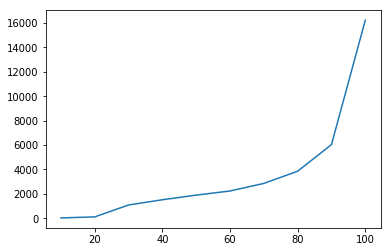

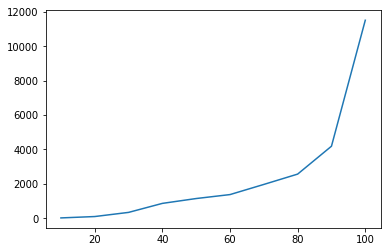

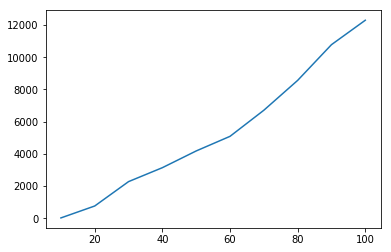

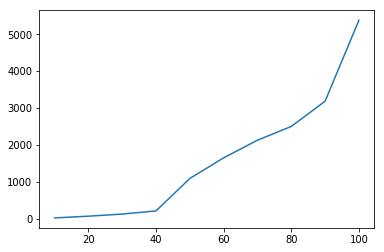

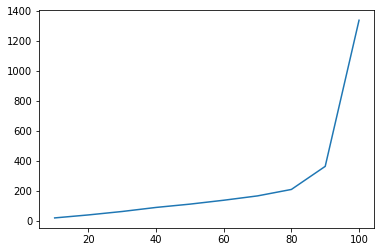

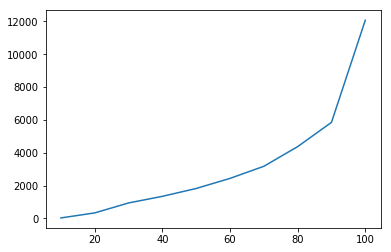

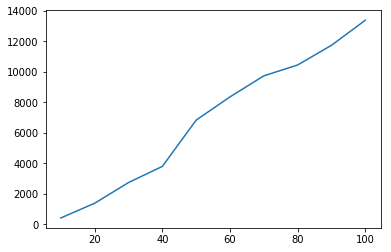

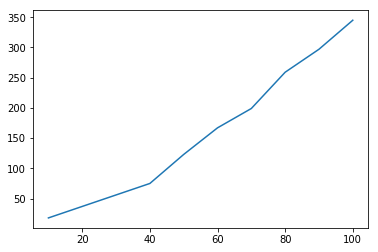

In [33]:
#this code is to use the distance function
def feature_distance(feature1, feature2):
    dist = 0.0
    for i in range(len(feature1)):
        dist += abs((feature1[i]*1.0-feature2[i]*1.0)/(1.0+feature1[i]*1.0+feature2[i]*1.0))
        #print(dist)
    return dist
x = X_hist
print(x.shape)
#print(unique_name[X_addrs[0]])
#print(Y_hist[0])
#print(Y_hist[1])
#print(feature_distance(x[0], x[10]))

#60 -> 0.
#50->0.
#40->0.
#35->0.
#30->0.


import matplotlib.pyplot as plt
import random
per_class = 188

def clc():
    #query_length = 70
    
    sm = 0
    run = 20
    for j in range(run):
        x_cord = []
        y_cord = []
        cnt = 10
        true_val = 0
        false_val = 0
        distance_list = []
        query_index = random.randint(1,x.shape[0])
        query = x[query_index]
        for i in range(len(Y_hist)):
            distance_list.append(feature_distance(query, x[i]))
            
        unsorted = zip(distance_list, Y_hist)
        sorted_touple = sorted(unsorted, key = lambda element : element[0])
        #print(len(sorted_touple))
        for i in range(len(sorted_touple)):
            if(sorted_touple[i][1] == Y_hist[query_index]):
                true_val = true_val + 1
                if(true_val==int((cnt/100.0)*per_class)):
                    #print(i+1, " instances needed for ",cnt, "% meaning",true_val, "no of images retrival")
                    x_cord.append(cnt)
                    y_cord.append(i+1)
                    cnt += 10.0
            else:
                #print("this is wrong "+str(i)+" confusing with "+str(sorted_touple[i][1]))
                false_val = false_val+1
        plt.plot(x_cord,y_cord)
        plt.show()
        #sm = sm + true_val*1.0/query_length*1.0
        #print(true_val*1.0/query_length*1.0)
        
   # return sm/run
#print("avg = ", clc())
clc()

In [36]:
#50 0.98
#45 0.9778
#40 100% all
#35 0.
#30 0.
#25 0.
#20 0.
#15 0.
#10 0.
#5 0.

import random
sm = 0
no_iter = 5
for iteration in range(no_iter):
    query_index = random.randint(1,119)
    query = x[query_index]

    query_length =50
    for i in range(len(Y_hist)):
        distance_list.append(feature_distance(query, x[i]))
        unsorted = zip(distance_list, Y_hist)
        sorted_touple = sorted(unsorted, key = lambda element : element[0])
        #print(len(sorted_touple))
    
    
    true_val = 0
    false_val = 0
    for i in range(query_length):
        if(sorted_touple[i][1] == Y_hist[query_index]):
            true_val = true_val + 1
        else:
            print("this is wrong "+str(i)+" no image is  confusing with "+str(sorted_touple[i][1]))
            false_val = false_val+1
    sm = sm +(true_val*1.0/query_length*1.0)
print(sm/no_iter)

this is wrong 0 no image is  confusing with 64
this is wrong 1 no image is  confusing with 64
this is wrong 2 no image is  confusing with 64
this is wrong 3 no image is  confusing with 64
this is wrong 4 no image is  confusing with 64
this is wrong 5 no image is  confusing with 64
this is wrong 6 no image is  confusing with 64
this is wrong 7 no image is  confusing with 64
this is wrong 8 no image is  confusing with 64
this is wrong 9 no image is  confusing with 64
this is wrong 10 no image is  confusing with 64
this is wrong 11 no image is  confusing with 64
this is wrong 12 no image is  confusing with 64
this is wrong 13 no image is  confusing with 64
this is wrong 14 no image is  confusing with 64
this is wrong 15 no image is  confusing with 64
this is wrong 16 no image is  confusing with 64
this is wrong 17 no image is  confusing with 64
this is wrong 18 no image is  confusing with 64
this is wrong 19 no image is  confusing with 64
this is wrong 20 no image is  confusing with 64
th

In [19]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
#clf = svm.SVC()
#clf = GaussianNB()
#clf = LogisticRegression()
#clf = MLPClassifier(alpha=1)
#clf = AdaBoostClassifier()
clf = RandomForestClassifier()
#clf = DecisionTreeClassifier()

#X_train = np.array(X_train)
print(type(X_train))

clf.fit(X_train,Y_train)

clf.score(X_test, Y_test)

<class 'numpy.ndarray'>


0.84834573373436761

In [20]:
import pickle
from sklearn.model_selection import cross_val_score
#clf = pickle.load(open('RandomForest_model.sav', 'rb'))
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)
scores = cross_val_score(clf,X_test,Y_test,cv=5)
print((scores))
clf.score(X_test, Y_test)

[ 0.7532567   0.74102964  0.76066351  0.73290426  0.76167076]


0.84470476492005697

In [21]:
import pickle
#for saving model
filename = 'my_double_lbp_model.sav'
pickle.dump(clf, open(filename, 'wb'))
clf = pickle.load(open('my_double_lbp_model.sav', 'rb'))
clf.score(X_test, Y_test)
#scores = cross_val_score(clf, X_test, Y_test, cv=20)
#print((scores))

0.84470476492005697

In [22]:
import numpy as np

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

from sklearn.svm import SVC

clf = SVC()
print(type(y))
clf.fit(X, y) 
print(clf.predict([[-0.8, -1]]))

<class 'numpy.ndarray'>
[1]


In [23]:
a = [0]*26
a = np.array(a)
b = a.copy()
b = [0]*14
b = np.array(b)
print(b.shape)
c = a+b
print(c)

(14,)


ValueError: operands could not be broadcast together with shapes (26,) (14,) 

In [ ]:
#lbp-> Local derivative ternary lbp last e  tetra 